In [2]:
import pandas as pd
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt
from IPython.display import display

In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/assignment_preprocessed.csv")

In [4]:
dataset.columns

Index(['id', 'ranking_score', 'agent_id', 'geography_name', 'sq_meters',
       'price', 'year_of_construction', 'floor', 'subtype', 'rooms',
       'no_of_bathrooms', 'no_of_wc', 'ad_type', 'living_rooms', 'kitchens',
       'balcony_area', 'lux_home', 'new_development', 'garage', 'furnished',
       'preserved', 'investment', 'unfinished', 'heating_under_floor',
       'renovated', 'requires_renovation', 'airy', 'bright', 'painted',
       'garden', 'ac', 'storage', 'balcony', 'internal_stairs', 'view',
       'secure_door', 'penthouse', 'alarm', 'corner', 'holiday_home',
       'student_home', 'night_power', 'neoclassic', 'double_glass',
       'for_commercial_use', 'fireplace', 'elevator', 'satellite',
       'solar_heater', 'attic', 'pool', 'playroom', 'price_per_sqm', 'decade'],
      dtype='object')

In [364]:
dataset.head(10)

,id,ranking_score,agent_id,geography_name,sq_meters,price,year_of_construction,floor,subtype,rooms,...,for_commercial_use,fireplace,elevator,satellite,solar_heater,attic,pool,playroom,price_per_sqm,decade
0,42911697,47.0,14680.0,northern sub,567,200000,2005,1,apartment,4,...,-1,-1,-1,-1,-1,-1,-1,-1,352.73,2000
1,43018583,134.7,15502.0,northern sub,642,550000,1992,ground-floor,detached,5,...,0,1,1,0,0,1,0,1,856.70,1990
2,39670968,71.0,9807.0,northern sub,320,500000,2009,ground-floor,detached,2,...,-1,1,-1,-1,-1,-1,-1,-1,1562.50,2000
3,39740833,122.0,14682.0,northern sub,95,230000,2007,1,apartment,3,...,0,1,1,0,0,0,0,0,2421.05,2000
4,36078547,116.5,8906.0,northern sub,291,970000,2010,ground-floor,maisonette,3,...,0,1,1,0,0,0,0,1,3333.33,2010
5,36152206,154.5,8123.0,northern sub,400,850000,2008,ground-floor,detached,6,...,0,1,1,1,1,1,1,1,2125.00,2000
6,43045884,27.8,11545.0,northern sub,583,220000,2155,ground-floor,detached,0,...,-1,-1,-1,-1,-1,-1,-1,-1,377.36,2150
7,42932512,160.5,8855.0,northern sub,440,1050000,1994,ground-floor,detached,4,...,0,1,1,0,1,0,1,1,2386.36,1990
8,43208870,124.8,11210.0,northern sub,300,550000,1993,ground-floor,detached,5,...,0,1,0,0,0,0,0,0,1833.33,1990
9,42301798,159.7,8855.0,northern sub,330,500000,2010,ground-floor,maisonette,3,...,0,1,0,0,1,0,0,1,1515.15,2010


# Creating a new subset
First we need to create a new subset based on our dataset using the columns of interest. In this case : 


```
columns_of_interest = ['year_of_construction', 'subtype', 'price', 'sq_meters', 'geography_name']
```

Then we need to create two new columns.
1. **Price per Square Meter** 
```
price_per_sqm = price / sq_meters
```
2. **Decade**
```
decade = year / (year%10)
```

In [13]:
columns_of_interest = ['ad_type', 'ranking_score', 'price_per_sqm', 'sq_meters', 'geography_name', 'subtype', 'decade']
subset = dataset[columns_of_interest].copy()

In [14]:
subset['time_on_market'] = 2020 - dataset['year_of_construction']

In [35]:
subset['ad_type'].unique()

array(['simple', 'up', 'premium', 'star'], dtype=object)

In [36]:
# replacing values
subset['ad_type'].replace(['simple', 'up', 'premium', 'star'],
                        [1, 2, 3, 4], inplace=True)

In [37]:
subset['ad_type'].value_counts()

1    9302
3     277
4     178
2     103
Name: ad_type, dtype: int64

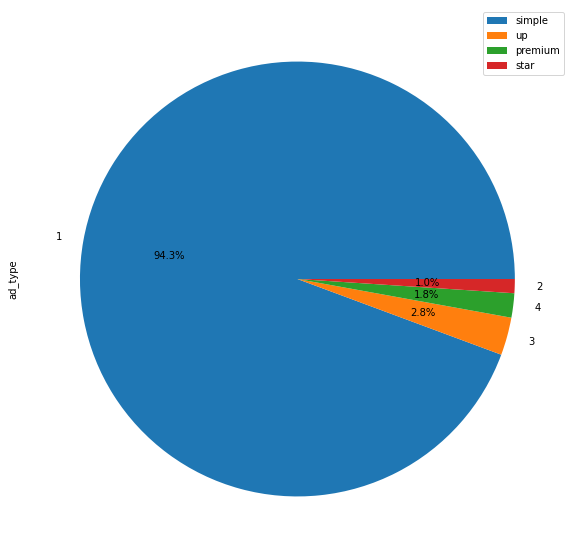

In [41]:
ax = subset['ad_type'].value_counts().plot.pie(figsize=(10, 10), y='MATH', autopct='%1.1f%%', legend=True)
plt.legend(labels =['simple', 'up', 'premium', 'star'])
plt.show()

In [32]:
to_groupby = 'geography_name'
find_stats_of = 'ad_type'

In [31]:
print('Price per square meter per', to_groupby)
display(subset.groupby(to_groupby, as_index=False).agg({find_stats_of:['count', 'min', 'max', 'mean', 'median', 'std']}))

Price per square meter per geography_name


geography_name ranking_score                                   \
                               count   min    max        mean  median   
0   beesy neighborhood          1598  33.5  170.5  113.744869  117.70   
1  gentrification area           616  29.3  177.7  119.857792  123.85   
2         northern sub          3505  27.8  181.9  116.264936  119.50   
3          south beach          4141  23.5  177.0  115.943589  120.70   

              
         std  
0  32.085281  
1  30.091367  
2  30.130535  
3  32.649372

In [33]:
print('Price per square meter per', to_groupby)
display(subset.groupby(to_groupby, as_index=False).agg({find_stats_of:['count', 'min', 'max', 'mean', 'median', 'std']}))

Price per square meter per geography_name


TypeError: ignored

In [28]:
price_std = price_std.replace(np.nan, 0)

In [29]:
price_std

geography_name
beesy neighborhood     32.085281
gentrification area    30.091367
northern sub           30.130535
south beach            32.649372
Name: ranking_score, dtype: float64